In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

## Web Scraping Covid-19 Data From Worldometers

In [ ]:
url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
table = soup.find('table', {'id':'main_table_countries_today'})

In [ ]:
headers = []

In [ ]:
for i in table.find_all('th'):
  title = i.text
  headers.append(title)

In [ ]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [ ]:
# Converting into DataFrame
df = pd.DataFrame(columns = headers)
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


In [ ]:
for row in table.find_all('tr')[1:]:
  data = row.find_all('td')
  row_data = [td.text.strip() for td in data]
  length = len(df)
  df.loc[length] = row_data

In [ ]:
df.sample(2)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
144,137,French Polynesia,"76,797",,649,,N/A,N/A,N/A,7,...,,,"284,164",Australia/Oceania,4,438,,,,"150,082"
85,78,Paraguay,"718,049",,"19,608",,"698,317",,124,7,...,"2,657,506","363,751","7,305,843",South America,10,373,3,,,17


## Exploratory Data Analysis of Covid-19 Dataset

In [ ]:
df.columns # columns present in dataset

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object')

In [ ]:
df.shape

(246, 22)

In [ ]:
df1 = df.drop('#',axis =1)

In [ ]:
df1.shape

(246, 21)

In [ ]:
df1.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,North America,"118,386,264",,"1,557,753",,"113,897,563","+3,063","2,930,948","7,799",,...,,,,North America,,,,,,
1,Asia,"195,946,349","+25,606","1,492,691",+44,"188,565,256","+37,047","5,888,402","9,247",,...,,,,Asia,,,,,,
2,Europe,"235,954,583",,"1,951,112",,"230,015,003","+35,480","3,988,468","7,645",,...,,,,Europe,,,,,,
3,South America,"64,623,305",,"1,334,024",,"62,939,315",,"349,966","10,110",,...,,,,South America,,,,,,
4,Oceania,"12,768,201","+5,527","21,887",+7,"12,533,084","+2,965","213,230",119,,...,,,,Australia/Oceania,,,,,,


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country,Other        246 non-null    object
 1   TotalCases           246 non-null    object
 2   NewCases             246 non-null    object
 3   TotalDeaths          246 non-null    object
 4   NewDeaths            246 non-null    object
 5   TotalRecovered       246 non-null    object
 6   NewRecovered         246 non-null    object
 7   ActiveCases          246 non-null    object
 8   Serious,Critical     246 non-null    object
 9   Tot Cases/1M pop     246 non-null    object
 10  Deaths/1M pop        246 non-null    object
 11  TotalTests           246 non-null    object
 12  Tests/
1M pop
       246 non-null    object
 13  Population           246 non-null    object
 14  Continent            246 non-null    object
 15  1 Caseevery X ppl    246 non-null    object
 16  1 Deathe

**The above information shows that all features have object data type**

In [ ]:
df1.describe(include = 'O') # Description of categorical data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
unique,239,238,10,220,4,223,20,205,86,231,...,214,215,229,8,85,210,43,7,3,200
top,Total:,"118,386,264",,,,N/A,,N/A,,,...,,,,Africa,2,,1,,,
freq,8,2,234,5,238,16,207,16,88,16,...,32,32,18,60,38,23,60,240,244,25


In [ ]:
# Number of unique values in each column
df1.nunique()

Country,Other          239
TotalCases             238
NewCases                10
TotalDeaths            220
NewDeaths                4
TotalRecovered         223
NewRecovered            20
ActiveCases            205
Serious,Critical        86
Tot Cases/1M pop       231
Deaths/1M pop          204
TotalTests             214
Tests/\n1M pop\n       215
Population             229
Continent                8
1 Caseevery X ppl       85
1 Deathevery X ppl     210
1 Testevery X ppl       43
New Cases/1M pop         7
New Deaths/1M pop        3
Active Cases/1M pop    200
dtype: int64

In [ ]:
# Converting empty strings into NaN values and finding how many are in our dataset
df1.NewDeaths.unique()

array(['', '+44', '+7', '+51'], dtype=object)

In [ ]:
type(df1.NewDeaths[0])

str

In [ ]:
new_df = df1.replace('',np.NaN)
new_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,North America,"118,386,264",NaN,"1,557,753",NaN,"113,897,563","+3,063","2,930,948","7,799",NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,"195,946,349","+25,606","1,492,691",+44,"188,565,256","+37,047","5,888,402","9,247",NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,"235,954,583",NaN,"1,951,112",NaN,"230,015,003","+35,480","3,988,468","7,645",NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,"64,623,305",NaN,"1,334,024",NaN,"62,939,315",NaN,"349,966","10,110",NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,"12,768,201","+5,527","21,887",+7,"12,533,084","+2,965","213,230",119,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Total:,"64,623,305",NaN,"1,334,024",NaN,"62,939,315",NaN,"349,966","10,110",NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
242,Total:,"12,768,201","+5,527","21,887",+7,"12,533,084","+2,965","213,230",119,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
243,Total:,"12,687,410",NaN,"257,969",NaN,"12,009,512",NaN,"419,929",843,NaN,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
244,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df.isnull().sum()

Country,Other            1
TotalCases               0
NewCases               234
TotalDeaths              5
NewDeaths              238
TotalRecovered           1
NewRecovered           207
ActiveCases              0
Serious,Critical        88
Tot Cases/1M pop        16
Deaths/1M pop           21
TotalTests              32
Tests/\n1M pop\n        32
Population              18
Continent                4
1 Caseevery X ppl       18
1 Deathevery X ppl      23
1 Testevery X ppl       32
New Cases/1M pop       240
New Deaths/1M pop      244
Active Cases/1M pop     25
dtype: int64

<b> The above observation shows the number null values column-wise

In [ ]:
new_df.isnull().sum().sum()

1479

In [ ]:
new_df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,North America,"118,386,264",NaN,"1,557,753",NaN,"113,897,563","+3,063","2,930,948","7,799",NaN,...,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,"195,946,349","+25,606","1,492,691",+44,"188,565,256","+37,047","5,888,402","9,247",NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Europe,"235,954,583",NaN,"1,951,112",NaN,"230,015,003","+35,480","3,988,468","7,645",NaN,...,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,"64,623,305",NaN,"1,334,024",NaN,"62,939,315",NaN,"349,966","10,110",NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
4,Oceania,"12,768,201","+5,527","21,887",+7,"12,533,084","+2,965","213,230",119,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization of Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
new_df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n',
       'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [ ]:
new = new_df.apply(pd.to_numeric, errors = 'ignore')

In [ ]:
type(new['TotalCases'][0])

str

In [ ]:
new.isnull().sum()

Country,Other            1
TotalCases               0
NewCases               234
TotalDeaths              5
NewDeaths              238
TotalRecovered           1
NewRecovered           207
ActiveCases              0
Serious,Critical        88
Tot Cases/1M pop        16
Deaths/1M pop           21
TotalTests              32
Tests/\n1M pop\n        32
Population              18
Continent                4
1 Caseevery X ppl       18
1 Deathevery X ppl      23
1 Testevery X ppl       32
New Cases/1M pop       240
New Deaths/1M pop      244
Active Cases/1M pop     25
dtype: int64

In [ ]:
df = new[new['Continent']=='Asia']

In [ ]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,Asia,"195,946,349","+25,606","1,492,691",44.0,"188,565,256","+37,047","5,888,402","9,247",NaN,...,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
9,India,"44,666,759",NaN,"530,531",NaN,"44,123,539",NaN,"12,689",698,"31,754",...,"902,386,407","641,523","1,406,631,776",Asia,31,"2,651",2.0,NaN,NaN,9
13,S. Korea,"26,217,994","+23,765","29,709",44.0,"25,401,440","+34,902","786,845",413,"510,774",...,"15,804,065","307,892","51,329,899",Asia,2,"1,728",3.0,463.0,0.9,"15,329"
16,Japan,"23,178,710",NaN,"47,579",NaN,"20,558,642",NaN,"2,572,489",232,"184,566",...,"79,118,302","629,999","125,584,838",Asia,5,"2,640",2.0,NaN,NaN,"20,484"
18,Turkey,"16,976,729",NaN,"101,327",NaN,"16,870,497","+1,635","4,905",NaN,"198,414",...,"162,743,369","1,902,052","85,561,976",Asia,5,844,1.0,NaN,NaN,57
20,Vietnam,"11,508,689",NaN,"43,166",NaN,"10,605,937",NaN,"859,586",38,"116,304",...,"85,826,548","867,342","98,953,541",Asia,9,"2,292",1.0,NaN,NaN,"8,687"
24,Taiwan,"8,034,295",NaN,"13,562",NaN,"7,462,865",NaN,"557,868",NaN,"336,323",...,"28,131,422","1,177,609","23,888,595",Asia,3,"1,761",1.0,NaN,NaN,"23,353"
25,Iran,"7,558,950",NaN,"144,612",NaN,"7,334,013",NaN,"80,325",73,"87,871",...,"54,420,785","632,632","86,022,837",Asia,11,595,2.0,NaN,NaN,934
27,Indonesia,"6,561,504",NaN,"159,104",NaN,"6,352,606",NaN,"49,794","2,771","23,507",...,"111,329,669","398,839","279,134,505",Asia,43,"1,754",3.0,NaN,NaN,178
34,Malaysia,"4,948,817",NaN,"36,548",NaN,"4,882,664",NaN,"29,605",91,"149,146",...,"65,859,474","1,984,851","33,181,072",Asia,7,908,1.0,NaN,NaN,892


In [ ]:
max_tests = df.sort_values(by = 'TotalTests', ascending = False)
max_tests.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
9,India,"44,666,759",NaN,"530,531",NaN,"44,123,539",NaN,"12,689",698,"31,754",...,"902,386,407","641,523","1,406,631,776",Asia,31,"2,651",2.0,NaN,NaN,9
93,Cyprus,"606,287",NaN,"1,210",NaN,"595,087",NaN,"9,990",60,"495,581",...,"9,640,118","7,879,860","1,223,387",Asia,2,"1,011",0.0,NaN,NaN,"8,166"
90,Myanmar,"632,679",NaN,"19,486",NaN,"606,946",NaN,"6,247",NaN,"11,456",...,"9,533,187","172,618","55,227,143",Asia,87,"2,834",6.0,NaN,NaN,113
20,Vietnam,"11,508,689",NaN,"43,166",NaN,"10,605,937",NaN,"859,586",38,"116,304",...,"85,826,548","867,342","98,953,541",Asia,9,"2,292",1.0,NaN,NaN,"8,687"
88,Kuwait,"662,359",NaN,"2,569",NaN,"659,512",NaN,278,2,"151,212",...,"8,416,379","1,921,405","4,380,326",Asia,7,"1,705",1.0,NaN,NaN,63


In [ ]:
max_cases = df.sort_values(by = 'TotalDeaths', ascending = False)
max_cases.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
84,Azerbaijan,"823,721",NaN,"9,963",NaN,"813,570",NaN,188,NaN,"79,971",...,"7,344,397","713,034","10,300,205",Asia,13,"1,034",1.0,NaN,NaN,18
83,Saudi Arabia,"824,513",NaN,"9,433",NaN,"811,470",NaN,"3,610",81,"23,002",...,"44,722,980","1,247,680","35,844,909",Asia,43,"3,800",1.0,NaN,NaN,101
102,Armenia,"445,397",NaN,"8,709",NaN,"434,441",NaN,"2,247",NaN,"149,866",...,"3,230,307","1,086,926","2,971,966",Asia,7,341,1.0,NaN,NaN,756
119,Laos,"216,363",+6,758,NaN,N/A,N/A,N/A,NaN,"28,922",...,"1,233,207","164,845","7,481,023",Asia,35,"9,869",6.0,0.8,NaN,"27,796"
36,DPRK,"4,772,813",NaN,74,NaN,"4,772,739",NaN,0,NaN,"183,636",...,NaN,NaN,"25,990,679",Asia,5,"351,225",NaN,NaN,NaN,NaN


In [ ]:
a = new.sort_values(by = 'ActiveCases', ascending=False)
a.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
118,Martinique,"223,728",NaN,"1,047",NaN,N/A,N/A,N/A,8,"598,064",...,"828,928","2,215,870","374,087",North America,2,357,0.0,NaN,NaN,"594,987"
143,Suriname,"81,228",NaN,"1,392",NaN,N/A,N/A,N/A,NaN,"136,099",...,"239,603","401,459","596,831",South America,7,429,2.0,NaN,NaN,"50,580"
212,Sierra Leone,"7,758",NaN,126,NaN,N/A,N/A,N/A,NaN,934,...,"259,958","31,296","8,306,436",Africa,"1,071","65,924",32.0,NaN,NaN,330
119,Laos,"216,363",+6,758,NaN,N/A,N/A,N/A,NaN,"28,922",...,"1,233,207","164,845","7,481,023",Asia,35,"9,869",6.0,0.8,NaN,"27,796"
120,Iceland,"206,803",NaN,219,NaN,N/A,N/A,N/A,2,"598,747",...,"1,996,384","5,780,036","345,393",Europe,2,"1,577",0.0,NaN,NaN,"378,986"


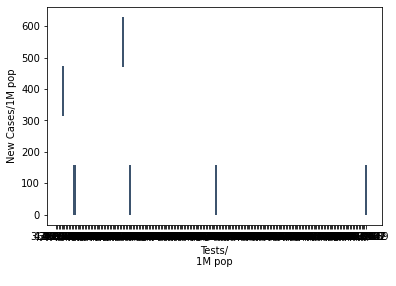

In [ ]:
# Histogram between Tests and New Cases
sns.histplot(x = 'Tests/\n1M pop\n', y = 'New Cases/1M pop', data = new)

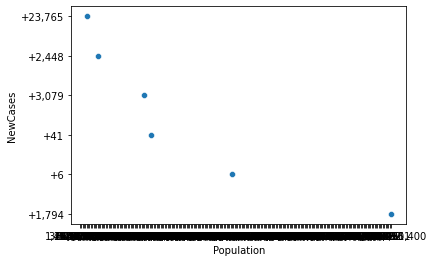

In [ ]:
# Scatterplot between population and New cases
sns.scatterplot(x = 'Population', y = 'NewCases', data = new)

<b> The above observation shows that number of deaths decrease with increase in number of cases

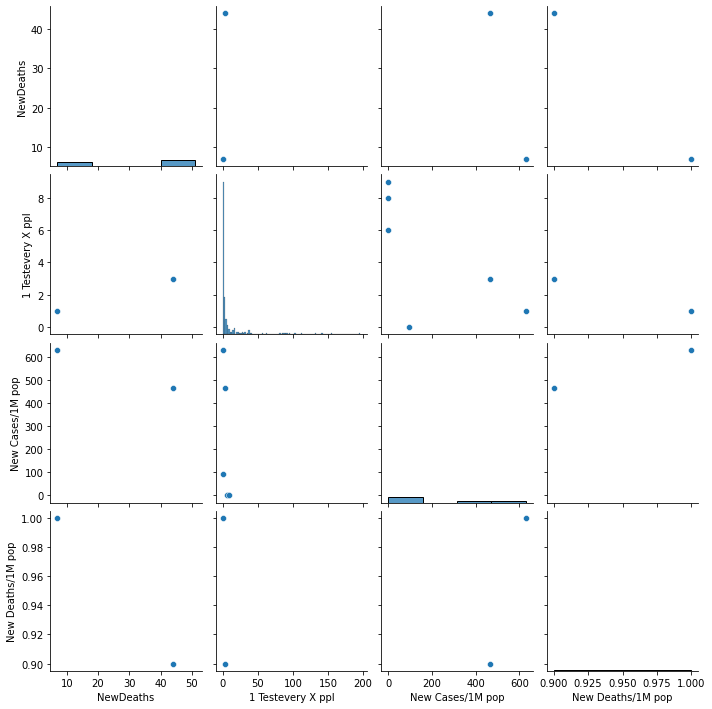

In [ ]:
# Pairplot
sns.pairplot(new)

In [ ]:
# Cases of Pakistan
pak_cases = new[new['Country,Other']=='Pakistan']
pak_cases

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
60,Pakistan,"1,574,680",+41,"30,629",NaN,"1,538,689",NaN,"5,362",44,"6,862",...,"30,570,862","133,213","229,488,994",Asia,146,"7,493",8.0,0.2,NaN,23


In [ ]:
ind_cases = new[new['Country,Other']=='India']
ind_cases

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
9,India,"44,666,759",NaN,"530,531",NaN,"44,123,539",NaN,"12,689",698,"31,754",...,"902,386,407","641,523","1,406,631,776",Asia,31,"2,651",2.0,NaN,NaN,9


In [ ]:
last_5 = new.tail()
last_5

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
241,Total:,"64,623,305",NaN,"1,334,024",NaN,"62,939,315",NaN,"349,966","10,110",NaN,...,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
242,Total:,"12,768,201","+5,527","21,887",7.0,"12,533,084","+2,965","213,230",119,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
243,Total:,"12,687,410",NaN,"257,969",NaN,"12,009,512",NaN,"419,929",843,NaN,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
244,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Total:,"640,366,833","+31,133","6,615,451",51.0,"619,960,439","+78,534","13,790,943","35,763","82,153.1",...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
